# Characterization of Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Analysis of a Passive Electrical Network

[Electrical networks](https://en.wikipedia.org/wiki/Electrical_network) composed of linear passive elements, like resistors, capacitors and inductors can be described by linear ordinary differential equations (ODEs) with constant coefficients. Hence, in view of the theory of signals and systems they can be interpreted as a linear time-invariant (LTI) system. The different ways to characterize the properties of an LTI system introduced before are illustrated at the example of a second-order analog [low-pass filter](https://en.wikipedia.org/wiki/Low-pass_filter).

![2nd-order analog lowpass filter](lowpass.png)

It is assumed that no energy is stored in the capacitor and inductor for $t<0$. It is furthermore assumed that $x(t) = 0$ for $t<0$. Hence $y(t) = 0$ and $\frac{d y(t)}{dt} = 0$ for $t<0$. For illustration, the normalized values $L = .5$, $R = 1$, $C = .4$ are used for the elements of the electrical network.

### Differential Equation

The differential equation describing the input/output relation of the electrical network is derived by applying [Kirchhoff's circuit laws](https://en.wikipedia.org/wiki/Kirchhoff's_circuit_laws) to the network. This results in the following ODE

\begin{equation}
C L \frac{d^2 y(t)}{dt^2} + C R \frac{d y(t)}{dt} + y(t) = x(t)
\end{equation}

This ODE is defined in `SymPy`

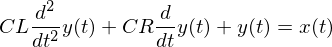

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, L, R, C = sym.symbols('t L R C', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(L*C*y.diff(t, 2) + R*C*y.diff(t) + y, x)
ode

The normalized values of the network elements are stored in a dictionary for substitution

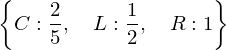

In [2]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}
RLC

### Impulse Response

The passive electrical network and the ODE describing its input/output relation can be interpreted as an LTI system. Hence, the system can be characterized by its [impulse response](impulse_response.ipynb) $h(t)$ which is defined as the output of the system for a Dirac impulse $x(t) = \delta(t)$ at the input. For the given system, the impulse response is calculated by explicit solution of the ODE

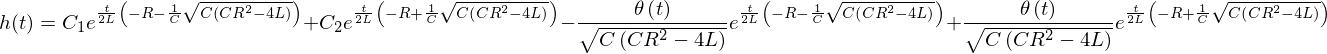

In [3]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

The integration constants $C_1$ and $C_2$ have to be determined from the initial conditions $y(t) = 0$ and $\frac{d y(t)}{dt} = 0$ for $t<0$. 

In [4]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

Substitution of the values for the integration constants $C_1$ and $C_2$ into the result from above yields the impulse response of the low-pass

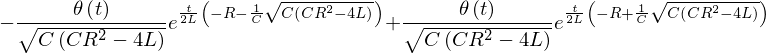

In [5]:
h = solution_h.subs(integration_constants).rhs
h

The impulse response is plotted for the values of $R$, $L$ and $C$ given above

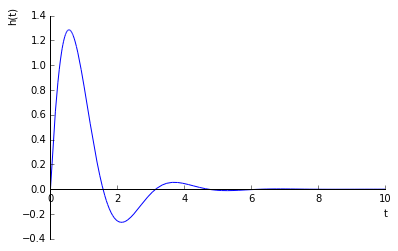

In [6]:
sym.plot(h.subs(RLC), (t,0,10), ylabel=r'h(t)');

### Step Response

The [step response](step_response.ipynb) is derived by integrating over the impulse response $h(t)$. For ease of illustration this is performed for the specific values of the elements given above

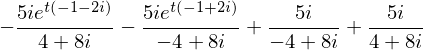

In [7]:
tau = sym.symbols('tau')

he = sym.integrate(h.subs(RLC).subs(t,tau).subs(sym.Heaviside(tau),1), (tau,0,t))
he

Let's plot the step response

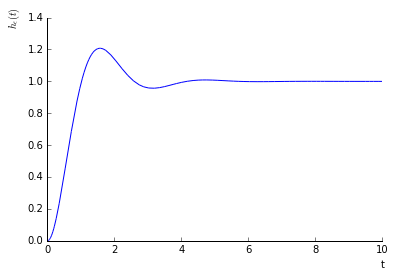

In [8]:
sym.plot(he, (t,0,10), ylabel=r'$h_\epsilon(t)$');

### Transfer Function

For an exponential input signal $x(t) = e^{s t}$, the [transfer function](eigenfunctions.ipynb#Transfer-Function) $H(s)$ represents the weight of the exponential output signal $y(t) = H(s) \cdot e^{s t}$. The transfer function is derived by introducing $x(t)$ and $y(t)$ into the ODE and solving for $H(s)$

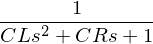

In [9]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

The transfer characteristics of an LTI system for harmonic exponential signals $e^{j \omega} = \cos(\omega t) + j \sin(\omega t)$ are of special interest in the analysis of electrical circuits. It can be derived from $H(s)$ by substituting the complex frequency $s$ with $s = j \omega$. The resulting transfer function $H(j \omega)$ provides the attenuation and phase of an harmonic input signal by the system.

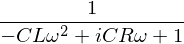

In [10]:
w = sym.symbols('omega')

Hjw = H.subs(s, sym.I * w)
Hjw

The magnitude of the transfer function $|H(j \omega)|$ is plotted for illustration

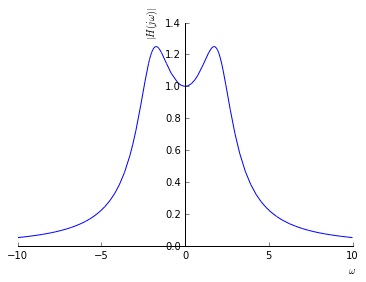

In [11]:
sym.plot(abs(Hjw.subs(RLC)), (w, -10, 10), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

It is obvious, that the low frequencies pass through the system and that high frequencies are attenuated. This motivates the term 'low-pass' for such systems.

As alternative to the solution of the ODE, the transfer function $H(s)$ is [computed from the impulse response](eigenfunctions.ipynb#Link-between-Transfer-Function-and-Impulse-Response) and plotted.

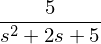

In [12]:
H2 = sym.integrate(h.subs(RLC)*sym.exp(-s*t), (t,0,sym.oo), conds='none')
H2 = H2.simplify()
H2

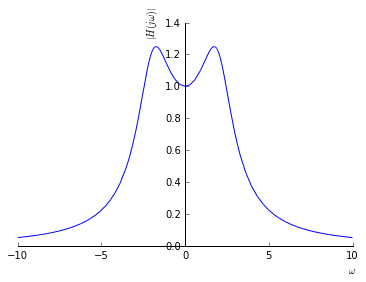

In [13]:
sym.plot(abs(H2.subs(s, sym.I*w)), (w, -10, 10), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.